In [51]:
import csv
import cv2
import copy
import itertools
import matplotlib as plot

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os
from os import listdir

RANDOM_SEED = 42
modelversion = 10

In [52]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode= True ,
    max_num_hands= 1,
    min_detection_confidence=0.7,
)

# file = '/content/drive/MyDrive/asl_alphabet/test'
# image = cv2.flip(cv2.imread(file + '/B/B1.jpg'), 1)
# idx = 2

# results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



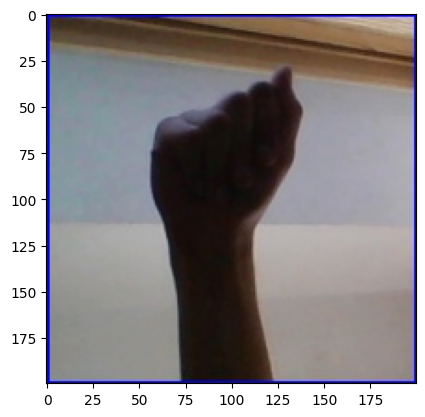

In [53]:
from PIL import Image
temp = Image.open('F:/hand-gesture-recognition-mediapipe/dataset/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')

plot.pyplot.imshow(temp)
plot.pyplot.show()

In [54]:
def calc_landmark_list(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    # Keypoint
    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        # landmark_z = landmark.z

        landmark_point.append([landmark_x, landmark_y])

    return landmark_point

def pre_process_landmark(landmark_list):
  temp_landmark_list = copy.deepcopy(landmark_list)

  # Convert to relative coordinates
  base_x, base_y = 0, 0
  for index, landmark_point in enumerate(temp_landmark_list):
      if index == 0:
          base_x, base_y = landmark_point[0], landmark_point[1]

      temp_landmark_list[index][0] = temp_landmark_list[index][0] - base_x
      temp_landmark_list[index][1] = temp_landmark_list[index][1] - base_y

  # Convert to a one-dimensional list
  temp_landmark_list = list(
      itertools.chain.from_iterable(temp_landmark_list))

  # Normalization
  max_value = max(list(map(abs, temp_landmark_list)))

  def normalize_(n):
      return n / max_value

  temp_landmark_list = list(map(normalize_, temp_landmark_list))

  return temp_landmark_list

def logging_csv(number, landmark_list):
  csv_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint.csv'
  with open(csv_path, 'a', newline="") as f:
    writer = csv.writer(f)
    writer.writerow([number, *landmark_list])


In [55]:
#Reading image files and classifying them
ltr2num = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9,
           'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 
           'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25,
           'del':26, 'space':27, 'blank':28}
num2ltr =  {value: key for key, value in ltr2num.items()}

file = 'F:/hand-gesture-recognition-mediapipe/dataset/asl_alphabet_train/asl_alphabet_train'
file2 = 'F:/hand-gesture-recognition-mediapipe/hassan_dataset_copy'
for ltr, num in ltr2num.items():
  print(ltr + 'started')

  if ltr != 'del':
    folder_dir = file2 + '/' + ltr
    for images in os.listdir(folder_dir):
  
      # check if the image ends with png
      if (images.endswith(".jpeg")):
        img = cv2.flip(cv2.imread(folder_dir + '/' + images), 1)
        debug_image = copy.deepcopy(img)

        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        if results.multi_hand_landmarks is not None:
          for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
                                                    results.multi_handedness):
          
            landmark_list = calc_landmark_list(debug_image, hand_landmarks)
            pre_processed_landmark_list = pre_process_landmark(landmark_list)
            logging_csv(num, pre_processed_landmark_list)
      
        img = cv2.flip(img, 1)
        debug_image = copy.deepcopy(img)

        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        if results.multi_hand_landmarks is not None:
          for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
                                                    results.multi_handedness):
          
            landmark_list = calc_landmark_list(debug_image, hand_landmarks)
            pre_processed_landmark_list = pre_process_landmark(landmark_list)
            logging_csv(num, pre_processed_landmark_list)        


  # for i in range(1, 3001):
  #   if i % 100 == 0:
  #     print(ltr + ':' + str(i) + 's started old')

  #   img = cv2.flip(cv2.imread(file + '/' + ltr + '/' + ltr + str(i) +'.jpg'), 1)
  #   debug_image = copy.deepcopy(img)

  #   image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
  #   image.flags.writeable = False
  #   results = hands.process(image)
  #   image.flags.writeable = True

  #   if results.multi_hand_landmarks is not None:
  #     for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
  #                                                 results.multi_handedness):
        
  #       landmark_list = calc_landmark_list(debug_image, hand_landmarks)
  #       pre_processed_landmark_list = pre_process_landmark(landmark_list)
  #       logging_csv(num, pre_processed_landmark_list)



  print(ltr + 'Done')
        
        


Astarted
ADone
Bstarted
BDone
Cstarted
CDone
Dstarted
DDone
Estarted
EDone
Fstarted
FDone
Gstarted
GDone
Hstarted
HDone
Istarted
IDone
Jstarted
JDone
Kstarted
KDone
Lstarted
LDone
Mstarted
MDone
Nstarted
NDone
Ostarted
ODone
Pstarted
PDone
Qstarted
QDone
Rstarted
RDone
Sstarted
SDone
Tstarted
TDone
Ustarted
UDone
Vstarted
VDone
Wstarted
WDone
Xstarted
XDone
Ystarted
YDone
Zstarted
ZDone
delstarted
delDone
spacestarted
spaceDone
blankstarted
blankDone


# Specify each path

In [56]:
dataset = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint.csv'
model_save_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint_classifier.hdf5'
tflite_save_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint_classifier.tflite'

# Set number of classes

In [57]:
NUM_CLASSES = 29

# Dataset reading

In [58]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [59]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [61]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Model building

In [63]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [64]:
import pickle

with open('./model'+str(modelversion)+'/SVMModel.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Confusion matrix

[[ 0.          0.         -0.19626169 ... -0.19158879  0.01869159
  -0.12616822]
 [ 0.          0.         -0.16867469 ... -0.14859438  0.09638554
  -0.12449799]
 [ 0.          0.          0.12264151 ... -0.25       -0.11556604
  -0.16273585]
 ...
 [ 0.          0.         -0.12468828 ... -0.2543641   0.02743142
  -0.1670823 ]
 [ 0.          0.          0.1017964  ... -0.5838323  -0.9011976
  -0.6826347 ]
 [ 0.          0.          0.05797102 ...  0.442029    0.5072464
   0.33695653]]


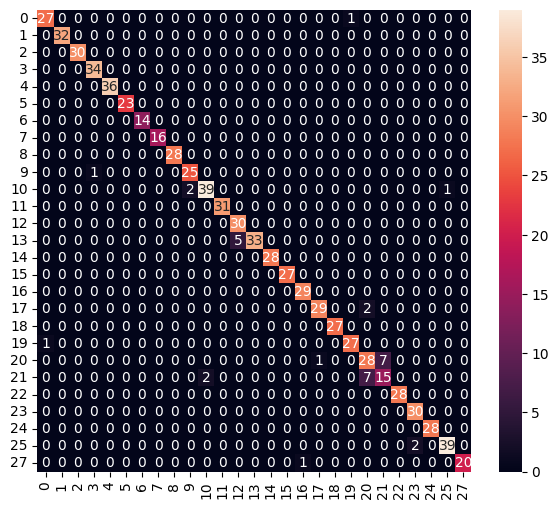

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        30
           3       0.97      1.00      0.99        34
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        28
           9       0.93      0.96      0.94        26
          10       0.95      0.93      0.94        42
          11       1.00      1.00      1.00        31
          12       0.86      1.00      0.92        30
          13       1.00      0.87      0.93        38
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        27
          16       0.97      1.00      0.98        29
     

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

print(X_test)

y_pred = clf.predict(X_test)

print_confusion_matrix(y_test, y_pred)

In [66]:
poop = pickle.load(open('model5/SVMModel.pkl', 'rb'))

print(poop.predict([[0.0, 0.0, -0.3576158940397351, -0.006622516556291391, -0.6490066225165563, -0.13245033112582782, -0.8344370860927153, -0.304635761589404, -1.0, -0.4900662251655629, -0.6291390728476821, -0.44370860927152317, -0.5099337748344371, -0.033112582781456956, -0.44370860927152317, 0.1456953642384106, -0.423841059602649, 0.1456953642384106, -0.32450331125827814, -0.5231788079470199, -0.17218543046357615, 0.006622516556291391, -0.1390728476821192, 0.1456953642384106, -0.15894039735099338, 0.1456953642384106, -0.006622516556291391, -0.5165562913907285, 0.08609271523178808, -0.006622516556291391, 0.11258278145695365, 0.1456953642384106, 0.09271523178807947, 0.1456953642384106, 0.2847682119205298, -0.45695364238410596, 0.3509933774834437, -0.0728476821192053, 0.33112582781456956, 0.1390728476821192, 0.2847682119205298, 0.1456953642384106]]))

[13]
